In [1]:
import keras
from keras import applications

import matplotlib.pylab as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
pretrained_vgg_16 = applications.VGG16(weights = 'imagenet', include_top = True)

In [3]:
pretrained_vgg_16.layers[-2].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'fc2',
 'trainable': True,
 'units': 4096,
 'use_bias': True}

In [4]:
from keras.models import Model

#building a new model that gets as input the shapes of inputs of vgg16 
# and outputs the activations on the penultimate layer of vgg16 (the layer is called fc2)
layer_name = 'fc2'
intermediate_layer_model = Model(inputs=pretrained_vgg_16.input,
                                 outputs=pretrained_vgg_16.get_layer(layer_name).output)

In [5]:
#reading an image using opencv
import cv2
im_path = '/home/ubuntu/Downloads/1.jpg'
image = cv2.imread(im_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [6]:
#reading an image using PIL
from PIL import Image
import numpy as np
image_pil = Image.open(im_path)
image_pil = np.array(image_pil)

In [9]:
#resizing the image using scipy
from scipy.misc import imresize
imresize_pil = imresize(image_pil,(224,224))

/home/ubuntu/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()


In [10]:
imresize_pil.shape

(224, 224, 3)

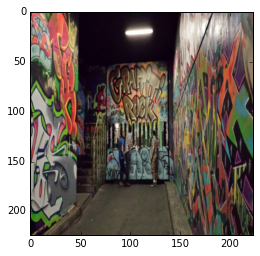

In [11]:
plt.imshow(imresize_pil)

In [12]:
#resizing the image using opencv
resized_image = cv2.resize(image,(224,224))

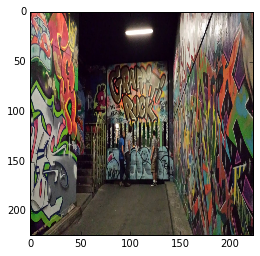

In [13]:
plt.imshow(resized_image)

In [14]:
#adding a dummy dimension
resized_image_with_dummy_dimensions = resized_image[None,:,:,:]

In [15]:
#getting the feature vector for this image
feature_vec = intermediate_layer_model.predict(resized_image_with_dummy_dimensions)

In [16]:
feature_vec.shape

(1, 4096)

In [19]:
import os
BASE_IM_DIR = '/home/ubuntu/Downloads/examples/'
album_list = os.listdir(BASE_IM_DIR)

full_im_path_list = []
for album_name in album_list:
    cur_album_path = os.path.join(BASE_IM_DIR,album_name)
    cur_im_list = os.listdir(cur_album_path)
    cur_im_list = [os.path.join(cur_album_path,im_name) for im_name in cur_im_list]
    full_im_path_list.extend(cur_im_list)


In [ ]:
[im_name for im_name in im_list if not im_name.endswith('avi')]

In [21]:
feature_vec_list = []
for im_ind, full_im_path in enumerate(full_im_path_list):
    if im_ind %10==0:
        print (im_ind)
    #reading the image
    im = cv2.imread(full_im_path)
    #converting form bgr to rgb
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    #resizing
    im = cv2.resize(im,(224,224))
    #adding a dummy dimension
    im = im[None]
    #extracting a feature vec for each iamge
    feature_vec = intermediate_layer_model.predict(im)
    
    #concatenating the feature vectors to one big list
    feature_vec_list.append(feature_vec.ravel())


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150


In [23]:
feature_vec_list[0]

array([ 0.94842738,  0.81762409,  0.06230289, ...,  0.82680696,
        0.        ,  0.        ], dtype=float32)

In [24]:
full_im_path_list[0]

'/home/ubuntu/Downloads/examples/album2/54.jpg'

In [26]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=11)

In [29]:
neigh.fit(feature_vec_list)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=11, p=2, radius=1.0)

In [69]:
query_vec = feature_vec_list[100]
distances,indices = neigh.kneighbors(query_vec[None])

In [73]:
query_vec

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [74]:
indices

array([[100, 136, 128, 112, 142, 156,  91,   2,  97, 127, 134]])

In [75]:
distances

array([[  0.        ,  72.41645488,  82.11346826,  83.32023432,
         84.37949956,  84.9315334 ,  86.55755167,  86.90452194,
         90.27148063,  90.58961768,  91.5518316 ]])

In [76]:
full_im_path_list[100]

'/home/ubuntu/Downloads/examples/album1/14.jpg'

In [77]:
full_im_path_list[136]

'/home/ubuntu/Downloads/examples/album1/13.jpg'

In [78]:
full_im_path_list[128]

'/home/ubuntu/Downloads/examples/album1/17.jpg'

In [79]:
full_im_path_list[112]

'/home/ubuntu/Downloads/examples/album1/15.jpg'

In [ ]:
assert 0

In [ ]:
ONE_ALBUM_DIR = '/home/ubuntu/Downloads/examples/album2/'

In [ ]:
im_list = os.listdir(ONE_ALBUM_DIR)

In [ ]:
feature_vec_list = []
for full_im_path in im_list:
    #reading the image
    im = cv2.imread(os.path.join(ONE_ALBUM_DIR, full_im_path))
    #converting form bgr to rgb
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    #resizing
    im = cv2.resize(im,(224,224))
    #adding a dummy dimension
    im = im[None]
    #extracting a feature vec for each iamge
    feature_vec = intermediate_layer_model.predict(im)
    
    #concatenating the feature vectors to one big list
    feature_vec_list.append(feature_vec.ravel())

In [ ]:
os.path.join('/home/ubuntu/Downloads/examples/album2/',full_im_path)

In [ ]:
feature_vec_list[1].shape

In [ ]:
im_list[1]